<a href="https://colab.research.google.com/github/lukasztracz195/DeepLearningInPythonCourse/blob/main/MNIST_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sieć Neuronowa - Perceptron Wielowarstwowy - Multiplayer Perceptron

####Import bibliotek

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

####Załadowanie danych

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


#####Eksloracja danych

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba danych treningowych: ', X_train.shape[0])
print('Liczzba danych testowych: ',X_test.shape[0])
print("Rozmiar pojedynczego obrazka: ", X_train[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba danych treningowych:  60000
Liczzba danych testowych:  10000
Rozmiar pojedynczego obrazka:  (28, 28)


(-0.5, 27.5, 27.5, -0.5)

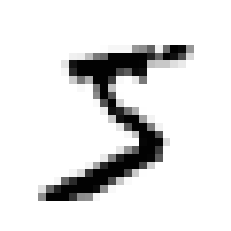

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.axis('off')

### Wyświetlenie kilku obrazków

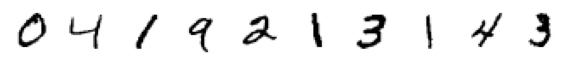

In [5]:
plt.figure(figsize=(10,10))
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_train[i], cmap='Greys')
plt.show()

###Etykiety


In [6]:
X_train.shape

(60000, 28, 28)

### Przygotowanie danych

In [7]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Budowa modelu

In [9]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28*28,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

### Trenowanie modelu

In [11]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20,validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 8s 17ms/step - loss: 0.2231 - accuracy: 0.9306 - val_loss: 0.1149 - val_accuracy: 0.9644
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0830 - accuracy: 0.9743 - val_loss: 0.0800 - val_accuracy: 0.9761
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0544 - accuracy: 0.9841 - val_loss: 0.0697 - val_accuracy: 0.9799
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0383 - accuracy: 0.9880 - val_loss: 0.0694 - val_accuracy: 0.9824
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0976 - val_accuracy: 0.9743
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0223 - accuracy: 0.9930 - val_loss: 0.1059 - val_accuracy: 0.9783
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0187 - accuracy: 0.9943 - val_loss: 0.1241 - val_accuracy: 0.9766

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2414 - accuracy: 0.9787


[0.24142040312290192, 0.9786999821662903]

### Wykres dokładności i straty

In [35]:
def make_accuracy_plot(history):
  """
  Funckja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym i walidacyjnym.
  """

  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.set()
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
  epochs = range(1, len(acc)+1)

  plt.figure(figsize=(10,8))
  plt.plot(epochs, acc, label='Dokladność trenowania', marker='o')
  plt.plot(epochs, val_acc, label='Dokladność walidacji', marker='o')
  plt.legend()
  plt.title('Dokładność trenowania i walidacji')
  plt.xlabel('Epoki')
  plt.ylabel('Dokładność')
  plt.show()

In [36]:
def make_loss_plot(history):
  """
  Funkjca zwraca wykres straty (loss) modelu na zbiorze treningowym
  i walidacyjnym
  """

  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.set()
  loss, val_loss = history.history['loss'], history.history['val_loss']
  epochs = range(1, len(loss)+ 1)

  plt.figure(figsize = (10,8))
  plt.plot(epochs, loss, label='Strata trenowania', marker='o')
  plt.plot(epochs, val_loss, label="Strata walidacji", marker='o')
  plt.legend()
  plt.title('Strata trenowania i walidacji')
  plt.xlabel('Epoki')
  plt.ylabel('Strata')
  plt.show()

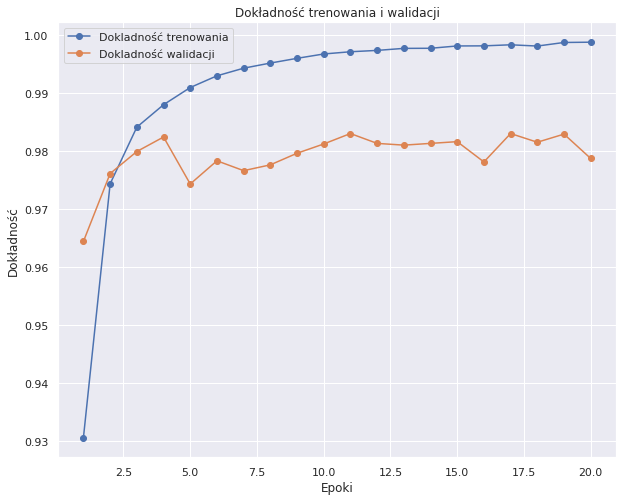

In [37]:
make_accuracy_plot(history)

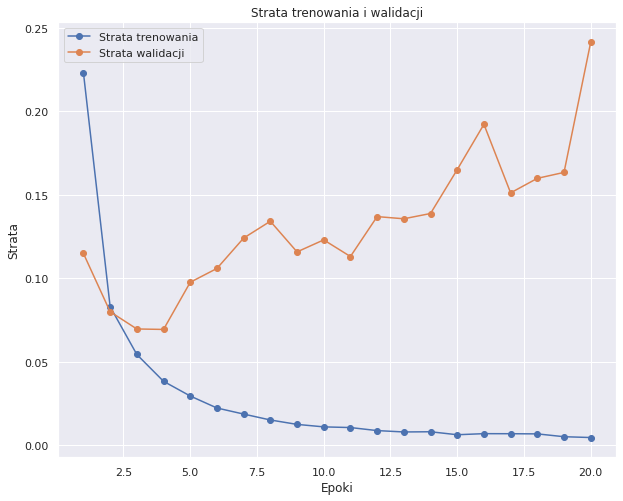

In [38]:
make_loss_plot(history)

### Nap odstawie tych dwóch wykresów jestśmy w stanie zlokalizować zjawisko overfitingu na drugim wykresie jest to epoka od której funkcja prezentująca nasza stratę walidacji zaczyna rosnąć a nie maleć.
### Z powyższych wykresów wynika że powinniśmy przerwać uczenie się sieci już po 5-6 epokach